In [77]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectPercentile,chi2
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
#importing data
hotel = pd.read_csv(r"C:\Users\Omar\OneDrive\Desktop\ML\first inten project\first inten project.csv")
hotel.head(10)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
5,INN00006,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.00,1,9/13/2016,Canceled
6,INN00007,1,1,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
7,INN00008,3,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
8,INN00009,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [4]:
#knowing categorical and numerical data
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

I have 16 feature , 5 are categorical.
categorical data are =>  Booking_ID , type of meal , room type , market segment type and date of reservation\

I don't have null data so i dant need to clean the data.

In [5]:
#make the features as categorical and numerical
hotel_cat_features = pd.DataFrame(hotel,columns=["Booking_ID","type of meal", "room type","market segment type" ,"date of reservation"])
hotel_num_features = hotel.drop(["Booking_ID","type of meal", "room type","market segment type" ,"date of reservation","booking status"],axis=1)
hotel_num_features.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
0,1,1,2,5,0,224,0,0,0,88.00,0
1,1,0,1,3,0,5,0,0,0,106.68,1
2,2,1,1,3,0,1,0,0,0,50.00,0
3,1,0,0,2,0,211,0,0,0,100.00,1
4,1,0,1,2,0,48,0,0,0,77.00,0


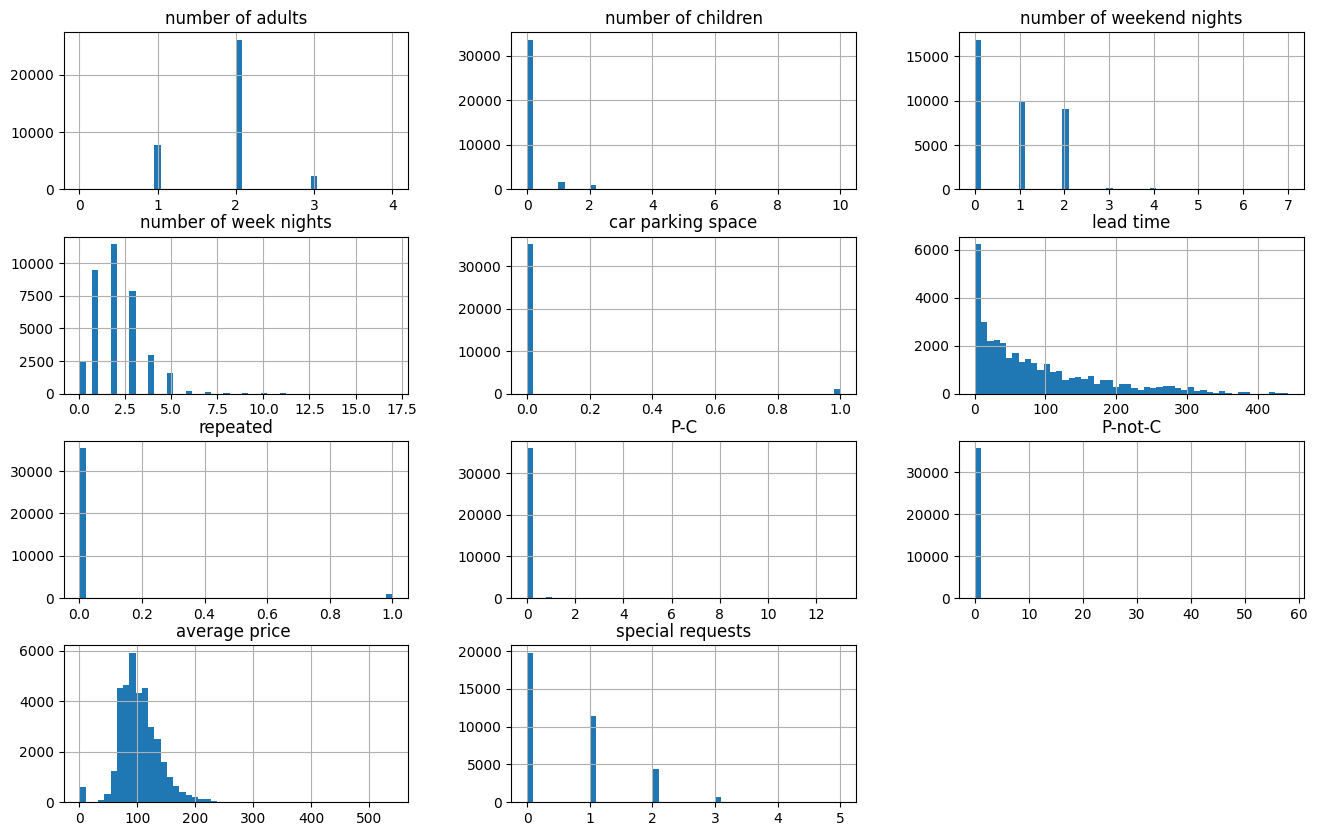

In [6]:

hotel.hist(bins=50,figsize=(16,10))
plt.show()

notice from the figure that:
1-Booking_ID (unique identifier for each reservation)
2-Lead time (possibly the time between booking the reservation and the arrival date)
3-All the numerical data arenot continous execpt lead time and average price
4-lead time feature has outlair from IQR method
5-car parking and repeated are encoded categorical features as yes or no.


In [7]:
hotel_num_features["repeated"].value_counts()

repeated
0    35355
1      930
Name: count, dtype: int64

So,i have in this feature 0 or 1 only.
as car parking.

In [8]:
hotel_num_features["lead time"].describe()

count    36285.000000
mean        85.239851
std         85.938796
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead time, dtype: float64

from IQR method this feature has outlair

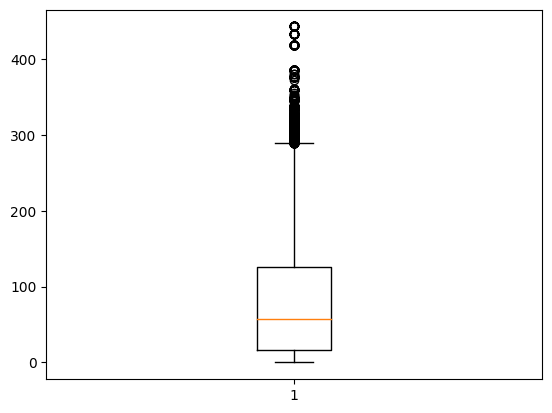

In [9]:
#Showing the outlair
plt.boxplot(hotel_num_features["lead time"])
plt.show()

 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  special requests          36285 non-null  int64  
 15  date of reservation       36285 non-null  object 
 16  booking status

In [20]:
#Clean data from outlairs,and making scaling for continious data
two_features = pd.read_csv(r"C:\Users\Omar\OneDrive\Desktop\ML\first inten project\first inten project.csv",usecols=["lead time" , "average price "])
hotel_num_features

hotel_num_features_scaled = StandardScaler().fit_transform(two_features)
hotel_2num_features = pd.DataFrame(hotel_num_features_scaled,columns=["lead time","average price"])
hotel_2num_features.head(10)

,lead time,average price
0,1.614661,-0.439538
1,-0.933699,0.092868
2,-0.980244,-1.522592
3,1.463389,-0.097521
4,-0.433336,-0.753054
5,3.034296,-0.097521
6,-0.596245,0.117664
7,-0.026064,0.062371
8,0.416118,-0.185876
9,-0.479881,0.855566


In [34]:
hotel_num_features.drop(["lead time","average price "],axis=1,inplace=True)

Now,i have handle cleaning and plotting the numerical data.

In [11]:
#Handling categorical data
hotel_cat_features.head(10)

,Booking_ID,type of meal,room type,market segment type,date of reservation
0,INN00001,Meal Plan 1,Room_Type 1,Offline,10/2/2015
1,INN00002,Not Selected,Room_Type 1,Online,11/6/2018
2,INN00003,Meal Plan 1,Room_Type 1,Online,2/28/2018
3,INN00004,Meal Plan 1,Room_Type 1,Online,5/20/2017
4,INN00005,Not Selected,Room_Type 1,Online,4/11/2018
5,INN00006,Meal Plan 2,Room_Type 1,Offline,9/13/2016
6,INN00007,Meal Plan 1,Room_Type 1,Online,10/15/2017
7,INN00008,Meal Plan 1,Room_Type 4,Online,12/26/2018
8,INN00009,Meal Plan 1,Room_Type 1,Offline,7/6/2018
9,INN00010,Meal Plan 1,Room_Type 4,Online,10/18/2018


In [12]:
#As the id and date features arenot impact on the reasults so i will drop them.
hotel_cat_features = hotel_cat_features.drop(["Booking_ID","date of reservation"],axis=1)
# hotel_cat_features.head(10)

In [37]:
#Now there to can process the data,i will encode this data
hotel_cat_features_encoded = OrdinalEncoder().fit_transform(hotel_cat_features)
hotel_cat_features_encoded = pd.DataFrame(hotel_cat_features_encoded,columns=['type of meal', 'room type', 'market segment type'])

hotel_cat_features_encoded


,type of meal,room type,market segment type
0,0.0,0.0,3.0
1,3.0,0.0,4.0
2,0.0,0.0,4.0
3,0.0,0.0,4.0
4,3.0,0.0,4.0
...,...,...,...
36280,1.0,0.0,4.0
36281,0.0,0.0,4.0
36282,0.0,3.0,4.0
36283,0.0,0.0,3.0


Now we will concatnate my data

In [38]:
hotel_2num_features

,lead time,average price
0,1.614661,-0.439538
1,-0.933699,0.092868
2,-0.980244,-1.522592
3,1.463389,-0.097521
4,-0.433336,-0.753054
...,...,...
36280,3.034296,0.330000
36281,-0.596245,0.117664
36282,-0.026064,0.062371
36283,0.416118,-0.185876


In [43]:
#connecting data => hotel_2num_feature + hotel_cat_features_encoded + hotel_num_features

my_data = hotel_2num_features.join(hotel_num_features)
my_data

,lead time,average price,number of adults,number of children,number of weekend nights,number of week nights,car parking space,repeated,P-C,P-not-C,special requests
0,1.614661,-0.439538,1,1,2,5,0,0,0,0,0
1,-0.933699,0.092868,1,0,1,3,0,0,0,0,1
2,-0.980244,-1.522592,2,1,1,3,0,0,0,0,0
3,1.463389,-0.097521,1,0,0,2,0,0,0,0,1
4,-0.433336,-0.753054,1,0,1,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
36280,3.034296,0.330000,2,0,0,2,0,0,0,0,1
36281,-0.596245,0.117664,2,0,1,3,0,0,0,0,1
36282,-0.026064,0.062371,2,0,1,3,0,0,0,0,1
36283,0.416118,-0.185876,3,0,0,4,0,0,0,0,1


In [78]:
my_data = my_data.join(hotel_cat_features_encoded)


ValueError: columns overlap but no suffix specified: Index(['type of meal', 'room type', 'market segment type'], dtype='object')

In [47]:
my_data

,lead time,average price,number of adults,number of children,number of weekend nights,number of week nights,car parking space,repeated,P-C,P-not-C,special requests,type of meal,room type,market segment type
0,1.614661,-0.439538,1,1,2,5,0,0,0,0,0,0.0,0.0,3.0
1,-0.933699,0.092868,1,0,1,3,0,0,0,0,1,3.0,0.0,4.0
2,-0.980244,-1.522592,2,1,1,3,0,0,0,0,0,0.0,0.0,4.0
3,1.463389,-0.097521,1,0,0,2,0,0,0,0,1,0.0,0.0,4.0
4,-0.433336,-0.753054,1,0,1,2,0,0,0,0,0,3.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,3.034296,0.330000,2,0,0,2,0,0,0,0,1,1.0,0.0,4.0
36281,-0.596245,0.117664,2,0,1,3,0,0,0,0,1,0.0,0.0,4.0
36282,-0.026064,0.062371,2,0,1,3,0,0,0,0,1,0.0,3.0,4.0
36283,0.416118,-0.185876,3,0,0,4,0,0,0,0,1,0.0,0.0,3.0


Done my data,now i want to make to things,feature selection and train test split.

In [63]:
#X y
X = my_data.copy()
y = hotel["Booking_ID"]

In [66]:
X

,lead time,average price,number of adults,number of children,number of weekend nights,number of week nights,car parking space,repeated,P-C,P-not-C,special requests,type of meal,room type,market segment type
0,1.614661,-0.439538,1,1,2,5,0,0,0,0,0,0.0,0.0,3.0
1,-0.933699,0.092868,1,0,1,3,0,0,0,0,1,3.0,0.0,4.0
2,-0.980244,-1.522592,2,1,1,3,0,0,0,0,0,0.0,0.0,4.0
3,1.463389,-0.097521,1,0,0,2,0,0,0,0,1,0.0,0.0,4.0
4,-0.433336,-0.753054,1,0,1,2,0,0,0,0,0,3.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,3.034296,0.330000,2,0,0,2,0,0,0,0,1,1.0,0.0,4.0
36281,-0.596245,0.117664,2,0,1,3,0,0,0,0,1,0.0,0.0,4.0
36282,-0.026064,0.062371,2,0,1,3,0,0,0,0,1,0.0,3.0,4.0
36283,0.416118,-0.185876,3,0,0,4,0,0,0,0,1,0.0,0.0,3.0


In [72]:
#As chi2 must the input to it is positive so
X["lead time"] = X["lead time"].abs()
X["average price"] = X["average price"].abs()
feature_selection = SelectPercentile(score_func=chi2,percentile=30)
X_new = feature_selection.fit_transform(X,y)

In [76]:
feature_selection.get_support()
#the best features are  type of meal,room type,P-C and P-not-C

array([False, False, False, False, False, False, False, False,  True,
        True, False,  True,  True, False])

Now spliting data to be prepered well for the algorithm.

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

Done!